In [1]:
%matplotlib inline

%matplotlib inline
%load_ext autoreload
%autoreload 2

import numpy as np

import xarray as xr

import regionmask

import pandas as pd

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import cartopy.feature as cfeat
import matplotlib.patches as mpatches
import cmocean

import glob


import sys
sys.path.append('../')
import utils
import plotting

np.seterr(invalid='ignore'); # disable a warning from matplotlib and cartopy

# Import Data

### Load in GEOS Chem Runs made from File Creation Notebook, Load in HEMCO Emissions Files

In [8]:
ds= xr.open_dataset('./final_data/ds_NOX_SO2_CH2O_daily.nc4')
ds_seasonal = utils.season_mean(ds)
for p in ['NO2','NOx','NO','SO2','CH2O']:
    ds_seasonal[p].attrs = {'units':'ppb'}



## US, CH2O/NO2 Ratio and Ozone

Using the FNR ratio from Jin et al. 2017 (Evaluating a Space-Based Indicator of Surface Ozone-NOx-
VOC Sensitivity Over Midlatitude Source Regions
and Application to Decadal Trends)

<0.5 = VOC limited

0.5-0.8 = transitional

0.8> = NOx limited

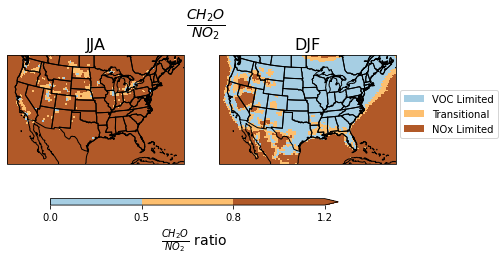

In [16]:
plotting.ratio_plot(ds_seasonal = ds_seasonal, species1 = 'CH2O', species2 = 'NO2',  seasons = ['JJA','DJF'], model = 'normal_NA', cmap = plotting.cmap_discrete,
                       rows = 1, columns = 2, levels = [0,.5,.8,1.2], lat_lon = [-120,-70,20,50], shrink_cbar = .7,
                       figsize = [8,3])
VOC_lim = mpatches.Patch(facecolor = plotting.cmap_discrete.colors[0], label = 'VOC Limited')
trans = mpatches.Patch(facecolor = plotting.cmap_discrete.colors[1], label = 'Transitional')
NOX_lim = mpatches.Patch(facecolor = plotting.cmap_discrete.colors[2], label = 'NOx Limited')
plt.legend(handles = [VOC_lim,trans,NOX_lim], loc='upper right', bbox_to_anchor=(1.57, 18.52));
plt.title('')
plt.suptitle(r'$\frac{CH_2O}{NO_2}$', fontsize = 20, y = .98, x = .47);

plt.savefig('./Figures/regime_national_ratio.png', bbox_inches = 'tight', dpi = 150)
